In [0]:
from keras.layers import Input, Dense
from keras.models import Model

In [0]:
encoding_dim = 32

In [0]:
input_img = Input(shape=(784,))

In [0]:
encoded = Dense(encoding_dim, activation='relu')(input_img)

In [0]:
decoded = Dense(784, activation='sigmoid')(encoded)

In [0]:
autoencoder = Model(input_img, decoded)

In [0]:
encoder = Model(input_img, encoded)

In [0]:
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [39]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [42]:
autoencoder.fit(x_train, x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.3609 - acc: 0.7501 - val_loss: 0.2706 - val_acc: 0.7947
Epoch 2/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2630 - acc: 0.7976 - val_loss: 0.2512 - val_acc: 0.7975
Epoch 3/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.2408 - acc: 0.7974 - val_loss: 0.2283 - val_acc: 0.7959
Epoch 4/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.2210 - acc: 0.7972 - val_loss: 0.2110 - val_acc: 0.7976
Epoch 5/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.2059 - acc: 0.7985 - val_loss: 0.1981 - val_acc: 0.7989
Epoch 6/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1948 - acc: 0.7998 - val_loss: 0.1887 - val_acc: 0.7998
Epoch 7/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1865 - acc: 0.8009 - val_loss: 0.1815 - val_acc

In [0]:
import matplotlib.pyplot as plt

In [0]:
test_img = x_test[1215,:]*255
test_img = test_img.reshape(28, 28)

In [0]:
encode= encoder.predict( x_test[1215, :].reshape(1, 784))

In [50]:
encode

array([[ 9.83504  ,  4.92692  ,  0.       ,  2.5030646,  4.647351 ,
        10.831563 ,  2.4218194, 12.652307 ,  6.718388 ,  7.552657 ,
         1.4605453,  2.6945794,  5.413339 ,  0.696768 ,  7.853054 ,
         2.0622423, 11.107449 ,  7.2087593,  7.1090007,  4.0367155,
         1.6516781,  9.398863 ,  8.529313 , 10.048162 ,  1.2352905,
        10.964515 , 10.032626 ,  5.9511213,  6.6900606,  7.10518  ,
         9.613419 ,  2.740822 ]], dtype=float32)

In [0]:
decode = decoder.predict(encode)

In [0]:
decode_img = decode.reshape(28,28)*255

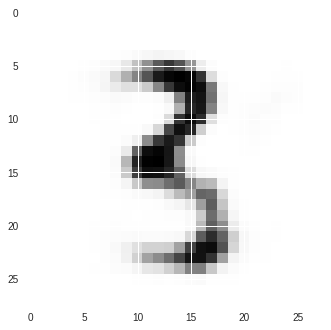

In [52]:
plt.imshow(decode_img)
plt.show()

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [0]:
import matplotlib.pyplot as plt

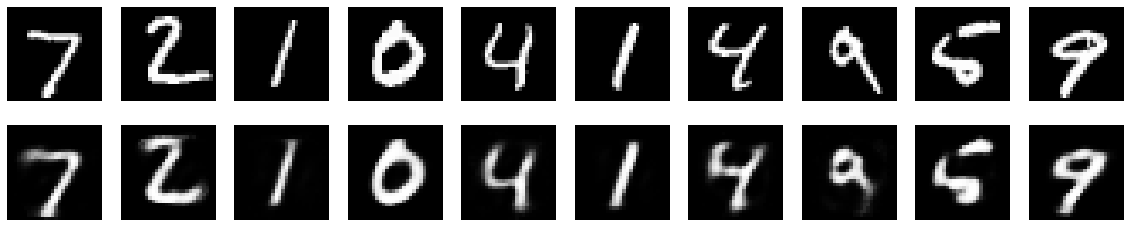

In [67]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
   ax = plt.subplot(2, n, i + 1)
   plt.imshow(x_test[i].reshape(28,28))
   plt.gray()
   ax.get_xaxis().set_visible(False)
   ax.get_yaxis().set_visible(False)
   ax = plt.subplot(2, n, i + 1 +n)
   plt.imshow(decoded_imgs[i].reshape(28,28))
   plt.gray()
   ax.get_xaxis().set_visible(False)
   ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [72]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.1930 - acc: 0.7966 - val_loss: 0.1875 - val_acc: 0.7960
Epoch 2/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.1861 - acc: 0.7978 - val_loss: 0.1824 - val_acc: 0.7998
Epoch 3/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.1802 - acc: 0.7987 - val_loss: 0.1779 - val_acc: 0.8040
Epoch 4/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.1742 - acc: 0.7999 - val_loss: 0.1683 - val_acc: 0.7971
Epoch 5/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.1686 - acc: 0.8013 - val_loss: 0.1652 - val_acc: 0.8049
Epoch 6/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.1636 - acc: 0.8024 - val_loss: 0.1610 - val_acc: 0.8046
Epoch 7/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.1594 - acc: 0.8033 - val_loss: 0.1548 - 

In [0]:
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))

In [74]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [75]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 784)               101136    
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

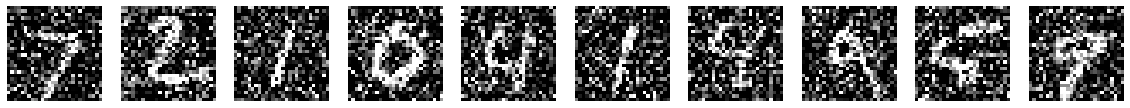

In [78]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

NameError: ignored